<center>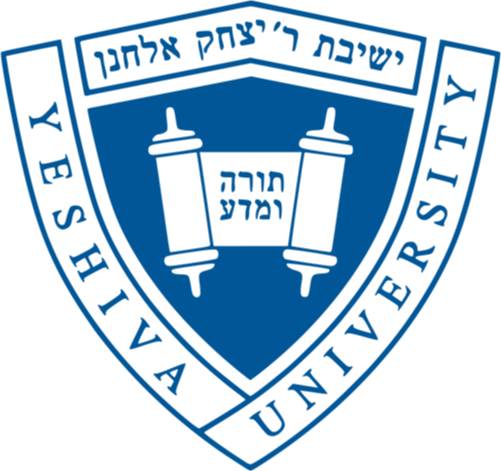</center>

<h1 style='text-align: center;'>Katz School of Science and Health</h1>
<h1 style='text-align: center;'>AIM 5004 Predictive Models</h1>
<p>
<h2 style='text-align: center;'>Midterm Project</h2>
<br><br>

<h3 style='text-align: center;'>Radek Jan Holik</h3>
<br>
<br>

# Package import

In [2]:
# Import some important packages here
import numpy as np
import pandas as pd
from scipy.stats import t, f
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Midterm project

Congratulations! You've been hired as a data scientist at the hottest new social media startup.

Your company produces an app via which users can post short videos for anyone to view. They can also like, repost, and comment on the videos they view. The key data product is a recommendation engine that determines the order in which videos are shown to a user.

The recommendation engine has a parameter, *theta*, that affects the ordering of the videos. Recently the team of engineers that works on the recommendation engine ran it with different settings of *theta* and, for each setting, measured the amount of time users spent on the app. They have collected these measurements into a data set of 20 samples of (*theta*, *time_spent*) pairs.

Additionally, they have identified two auxiliary features (*aux1* and *aux2*) that they hypoithesize should correlate with *time_spent*. These two features are measures of time spent by users in the recent past. The engineers have not verified that the features explain *time_spent*.

(The engineers call these two features "auxiliary" because, while they might help explain *time_spent*, the engineers' ultimate interest lies in the dependence of *time_spent* on *theta*.)

Your first project at your new company is to tell the engineers which setting you think they should use for *theta*, based on the data.

## 1. Prepare the data
- Inspect the data. Identifiy and remove any suspicious or unusable samples.
- Put the samples in a data structure that you can work with.

In [2]:
theta = [0.03906292, 0.05119367, 0.06004468, 0.06790036, 0.19152079,
       0.28298816, 0.294665  , 0.3578136 , 0.48352862, 0.53058676,
       0.55175137, 0.57560289, 0.59751325, 0.6375209 , 0.65241862,
       0.65633352, 0.78698546, 0.8640421 , 0.87729053, 0.94568319]
aux1 = [ 0.53983961, -1.77528229,  1.31487654, -0.47344805, -1.0922299 ,
       -0.25002744, -0.9822943 ,  1.03126909,  0.49133378, -0.4466466 ,
       -0.80636008,  0.13126776, -1.21256024,  0.15999085, -0.75522304,
        0.34989599,  0.97754176, -0.13858525,  0.10385631,  0.30059104]
aux2 = [ 0.9682053 ,  0.86962384,  0.56778309,  0.46528234, -1.16537308,
       -2.03599479, -1.15541329,  3.34515739,  0.12672721, -0.6941789 ,
        0.55767443,  0.0991466 ,  0.63792617,  0.70311068, -0.91609315,
       -0.78601423,  1.1191818 , -0.98339611,  0.24452002, -0.58140974]
time_spent = [10.79768391, 10.87648065, 10.29274937, 10.78756647,  9.51844772,
        9.18078781,  9.90063639, 12.84823357, 10.92743478,  9.88927608,
       11.3373709 , 11.43996915, 11.88392171, -11.88135476, 11.73452467,
       11.18844425, 12.19144316, 11.35294826, 12.2385441 , 11.98428985]

In [3]:
names = ["theta","aux1","aux2","time_spent"]
data_list = [theta, aux1, aux2, time_spent]

In [4]:
data = pd.DataFrame(list(zip(theta, aux1, aux2, time_spent)), columns=names)
data

,theta,aux1,aux2,time_spent
0,0.039063,0.539840,0.968205,10.797684
1,0.051194,-1.775282,0.869624,10.876481
2,0.060045,1.314877,0.567783,10.292749
3,0.067900,-0.473448,0.465282,10.787566
4,0.191521,-1.092230,-1.165373,9.518448
5,0.282988,-0.250027,-2.035995,9.180788
6,0.294665,-0.982294,-1.155413,9.900636
7,0.357814,1.031269,3.345157,12.848234
8,0.483529,0.491334,0.126727,10.927435
9,0.530587,-0.446647,-0.694179,9.889276


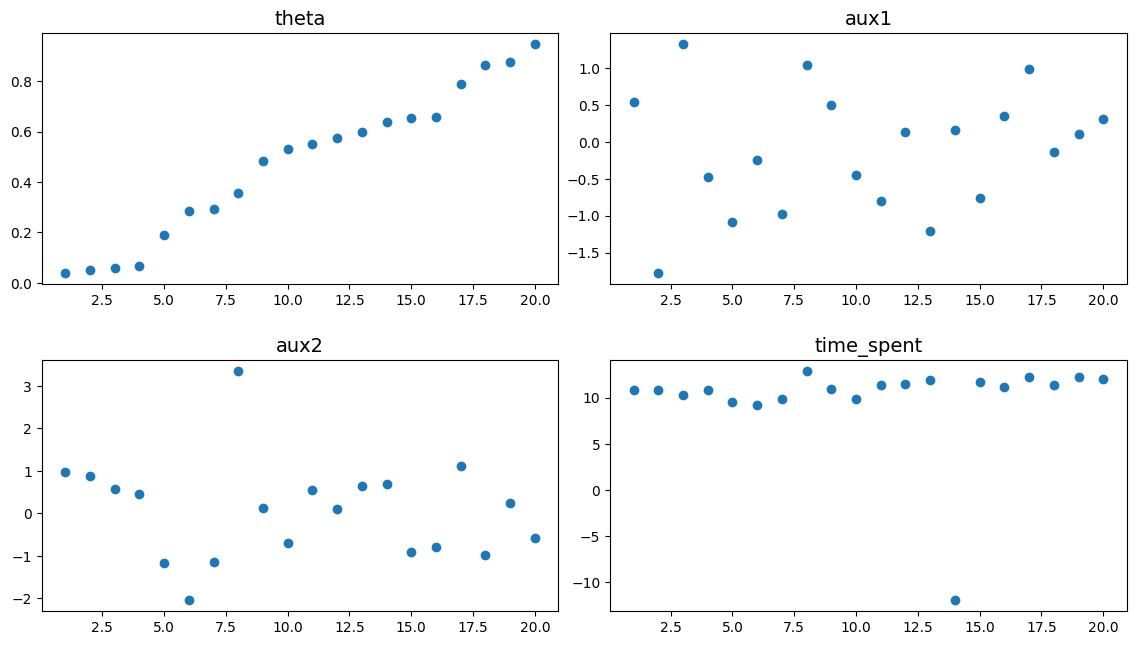

In [5]:
# Sample of 4 images from the training data
plt.figure(figsize = (14, 16))
for idx, val in enumerate(data_list):
    x = [i for i in range(1, len(theta) + 1)]

    plt.subplot(4, 2, idx + 1)
    plt.scatter(x, val)
    plt.title(names[idx], fontsize = 14)
    plt.xticks()
    plt.yticks()
    plt.subplots_adjust(wspace = 0.1, hspace = 0.3)

plt.show()

#### __Outlier search via Z-Score__

In [6]:
# Calculate z score for each row and column
mean = data.mean()
std = data.std()
z_score = (data - mean) / std

data_outlier = data[np.abs(z_score) > 3]

In [8]:
data_outlier

,theta,aux1,aux2,time_spent
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [9]:
# Outliers with a value greater than 3 (3 sigma) are saved
index_outlier = []

for i in range(len(data)):
    if data_outlier.iloc[i].any():
        index_outlier.append(i)

In [10]:
# Outliers
data.loc[index_outlier]

,theta,aux1,aux2,time_spent
13,0.637521,0.159991,0.703111,-11.881355


#### __Outlier removal__

In [11]:
data.drop(labels = index_outlier, inplace = True)
data.reset_index(drop = True, inplace = True)

In [12]:
data

,theta,aux1,aux2,time_spent
0,0.039063,0.539840,0.968205,10.797684
1,0.051194,-1.775282,0.869624,10.876481
2,0.060045,1.314877,0.567783,10.292749
3,0.067900,-0.473448,0.465282,10.787566
4,0.191521,-1.092230,-1.165373,9.518448
5,0.282988,-0.250027,-2.035995,9.180788
6,0.294665,-0.982294,-1.155413,9.900636
7,0.357814,1.031269,3.345157,12.848234
8,0.483529,0.491334,0.126727,10.927435
9,0.530587,-0.446647,-0.694179,9.889276


## 2. Build a model  

Write functions to run a regression, calculate the regression statistics listed below, and print a report.
- B (regressor coefficients plus one for an intercept, if appropriate)
- R2
- RSS
- RegSS
- TSS
- t statistic for each regressor coefficient

I found it useful to decompose the problem into three functions: `regress_calc()`, `regress_tstat()`, and `regress_report()`. You may write it however you see fit.  

You may include either, both, or neither of *aux1* and *aux2* in your final model. Experiment. What works best? Justify your decision.

In [13]:
def regress_calc(X, Y):

    # Fit linear regression model
    model = sm.OLS(Y, sm.add_constant(X)).fit()

    # Regressor coefficients
    intercept = model.params[0]
    B = model.params[1:]

    # Means
    meanX = np.mean(X, axis = 0)
    meanY = np.mean(Y, axis = 0)

    Xm = X - meanX
    Ym = Y - meanY

    Yhat = model.predict(sm.add_constant(X))[:, None]

    e = Y - Yhat

    RSS = (e.T @ e).item()
    TSS = (Ym.T @ Ym).item()
    RegSS = TSS - RSS
    R2 = RegSS / TSS

    return intercept, B, RSS, TSS, RegSS, R2

In [14]:
def regress_tstat(X, Y, alpha):

    model = sm.OLS(Y, sm.add_constant(X)).fit()
    B = model.params[1:]
    cov = model.cov_params()[1:, 1:]

    n, k = X.shape
    t_statistic = B / np.sqrt(np.diag(cov))
    p_values = (1 - t.cdf(abs(t_statistic), df = n - k - 1))*2
    significant_index = np.where(p_values < alpha)[0]
    significant_coefficient = B[significant_index]
    
    return t_statistic, p_values, significant_index, significant_coefficient

In [15]:
def regress_report(data_input):
    
    X = data_input.iloc[:, :-1].to_numpy()
    Y = data_input.iloc[:,-1].to_numpy()
    Y = Y[:, None]

    intercept, B, RSS, TSS, RegSS, R2 = regress_calc(X, Y)
    t_statistic, p_values, significant_index, significant_coefficient = regress_tstat(X, Y, 0.05)

    print("B (intercept + regressor coefficients) :\n")
    print(f"β0 (intercept) = {intercept}")
    for idx, b in enumerate(B):
        print(f"β{idx+1} = {b}")

    print(f"\nR² = {R2}")
    print(f"RSS = {RSS}")
    print(f"RegSS = {RegSS}")
    print(f"TSS = {TSS}")

    print(f"\nt-statistic for each regressor coefficient : {t_statistic}\n")

    print(f"p-values : {p_values}")

    print(f"\nSignificant index : {significant_index}")
    

    print("\nSignificant coefficient : ")
    for i in significant_index:
        print(f"β{i+1} = {B[i]}")

In [16]:
data_combinations = [["theta"],["aux1"],["aux2"],["theta","aux1"],["theta","aux2"],["aux1","aux2"],["theta","aux1","aux2"]]

In [17]:
print(75 * "=")
for combination in data_combinations:
    print(f"Combination : {combination}")
    regress_report(data.loc[:, combination + ["time_spent"]])
    print(75 * "=")

Combination : ['theta']
B (intercept + regressor coefficients :

β0 (intercept) = 10.187390486858531
β1 = 1.8958469391274777

R² = 0.3271664800151248
RSS = 11.829337228295259
RegSS = 5.7520359894974185
TSS = 17.581373217792677

t-statistic for each regressor coefficient : [2.87511388]

p-values : [0.01050165]

Significant index : [0]

Significant coefficient : 
β1 = 1.8958469391274777
Combination : ['aux1']
B (intercept + regressor coefficients :

β0 (intercept) = 11.125476234278956
β1 = 0.37638406521880263

R² = 0.10189665382786615
RSS = 15.78989011720074
RegSS = 1.7914831005919378
TSS = 17.581373217792677

t-statistic for each regressor coefficient : [1.38880498]

p-values : [0.18281999]

Significant index : []

Significant coefficient : 
Combination : ['aux2']
B (intercept + regressor coefficients :

β0 (intercept) = 11.053154274733275
β1 = 0.5280149159210801

R² = 0.4049514090035224
RSS = 10.46177136103074
RegSS = 7.119601856761937
TSS = 17.581373217792677

t-statistic for each reg

#### __It is noteworthy that the $R^2$ values for the three columns and (theta, aux2) are nearly identical at approximately 0.88, and these combinations are the best among the input columns. It is important to note that (aux1) is not significant in the experiment. Therefore, to achieve optimal accuracy, our final model should be a regression that predicts time spent based on the columns (theta, aux2).__

## 3. Propose a setting for *theta*

Now that you have a model built, you should be able to plot estimated *time_spent* vs. *theta* over a reasonable range of *theta*.  By inspecting that plot -- and knowning that the company wants to maximize the time users spend on the app -- which value of *theta* would you propose the engineers use? Explain how the data and your model support your decision.

The engineer's have capacity to take another set of measurements. Which settings of *theta* do you suggest they measure? Why?


In [18]:
theta = data["theta"].to_numpy()
time_spent = data["time_spent"].to_numpy()

In [19]:
model_theta_time_spent = sm.OLS(time_spent, sm.add_constant(theta)).fit()
Yhat_theta_time_spent = model_theta_time_spent.predict(sm.add_constant(theta))[:, None]

In [20]:
model_theta_time_spent.params

array([10.18739049,  1.89584694])

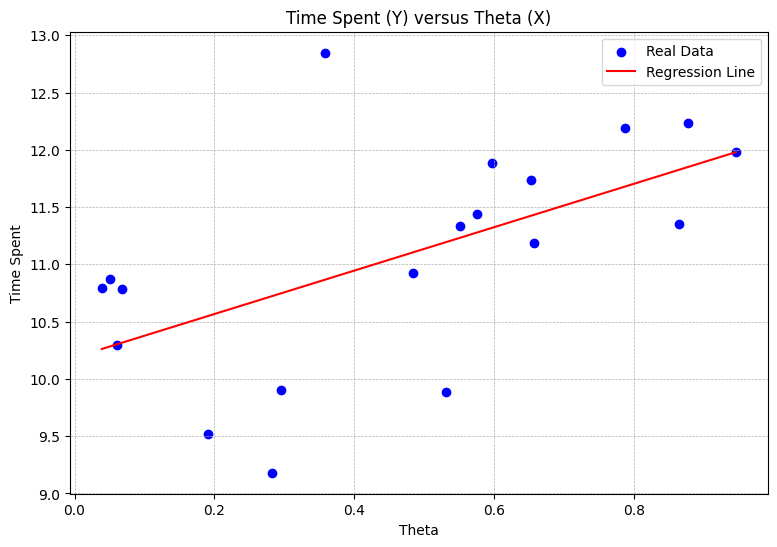

In [21]:
# Plot of the data and the corresponding Regression line
plt.figure(figsize = (9, 6))
plt.scatter(theta, time_spent, c='b', label = 'Real Data')
plt.plot(theta, Yhat_theta_time_spent, c = 'r', label = 'Regression Line')
plt.xlabel("theta".title())
plt.ylabel("time spent".title())
plt.title("Time Spent (Y) versus Theta (X)")
plt.legend()
plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

#### __The coefficient for theta, which is 1.89584694, indicates a positive relationship between the feature and time spent. Therefore, it can be observed from the above trend that with an increase in theta, there is a corresponding increase in time spent. Based on this trend, I would recommend that the team of engineers test theta with a value of 0.877291. Additionally, the features 'aux1' and 'aux2' also influence the value of time spent, causing fluctuations in time spent with higher values of theta. The coefficients show that 'aux1' has a quietly negative relationship with time spent, while 'aux2' has a slightly positive relationship with time spent. As mentioned in the previous task, aux1 does not have a significant effect on the accuracy of the regression model.__

## 4. Experiment or observation?

Is this data set experimental or observational? Explain clearly. Consider how the effect of *theta* on *time_spent* differs from the effect of *aux1* or *aux2*.

#### __This data set is observational in nature, meaning that I did not conduct any experiments or propose new data to determine if the results were replicable. Instead, I analyzed pre-existing observations. Based on the coefficients, we can observe that both theta and aux2 have a positive effect on time spent, while aux1 has a negative effect. Furthermore, the effects of theta and aux2 appear to be stronger than aux1, as indicated by their larger absolute coefficient values and smaller p-values from the t-test compared to aux1.__

# References

- Create a Pandas DataFrame from Lists : https://www.geeksforgeeks.org/create-a-pandas-dataframe-from-lists/

- Outlier Detection : https://towardsdatascience.com/outlier-detection-part1-821d714524c

- How to sort two lists (which reference each other) in the exact same way : https://stackoverflow.com/questions/9764298/how-to-sort-two-lists-which-reference-each-other-in-the-exact-same-way